In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZomAdmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZomAdmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip3 install spacy
##bohot error hai nikaal liyo baad me

%pip install wordcloud



import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
###from wordcloud import WordCloud(commneted by me )
%matplotlib inline

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ZomAdmin\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ZomAdmin\\AppData\\Local\\Temp\\pip-install-2xt7xvns\\wordcloud_2d8514de8c3d455d83523fb4b3180ef4\\setup.py'"'"'; __file__='"'"'C:\\Users\\ZomAdmin\\AppData\\Local\\Temp\\pip-install-2xt7xvns\\wordcloud_2d8514de8c3d455d83523fb4b3180ef4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ZomAdmin\AppData\Local\Temp\pip-wheel-bze92cnt'
       cwd: C:\Users\ZomAdmin\AppData\Local\Temp\pip-install-2xt7xvns\wordcloud_2d8514de8c3d455d83523fb4b3180ef4\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\li

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [6]:
data = pd.read_csv('zomatoreviews.csv',error_bad_lines=False,encoding="latin-1")

C:\Users\ZomAdmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [8]:
data2=data.drop(['Reviewer','Rating','Metadata','Time','Pictures'],axis=1)

In [9]:
data2

,Restaurant,Review
0,Beyond Flavours,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...
...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...
9996,Chinese Pavilion,This place has never disappointed us.. The foo...
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ..."
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...


In [10]:
data['word_count'] = data['Review'].apply(lambda x: len(str(x).split(" ")))
data[['Review','word_count']].head()

,Review,word_count
0,"The ambience was good, food was quite good . h...",39
1,Ambience is too good for a pleasant evening. S...,27
2,A must try.. great food great ambience. Thnx f...,31
3,Soumen das and Arun was a great guy. Only beca...,28
4,Food is good.we ordered Kodi drumsticks and ba...,27


In [11]:
data['Review'] = data['Review'].astype('str') 

In [12]:
data = [Review.strip() for Review in data.Review] # remove both the leading and the trailing characters
data = [Review for Review in data if Review] # removes empty strings, because they are considered in Python as False
data[0:10]

['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.',
 'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service',
 'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.',
 'Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.',
 'Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.',
 'Ambiance is good, service is good, food is aPradeecp and subro best service\nFood is good. Papiya good hoste

In [13]:
nlp = spacy.load("en_core_web_sm")

one_block = data[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [14]:
one_block

'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.'

In [15]:
for token in doc_block[0:20]:
    print(token, token.pos_)

A PRON
must AUX
try VERB
.. PUNCT
great ADJ
food NOUN
great ADJ
ambience NOUN
. PUNCT
Thnx NOUN
for ADP
the DET
service NOUN
by ADP
Pradeep PROPN
and CCONJ
Subroto PROPN
. PUNCT
My PRON
personal ADJ


In [16]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['recommendation', 'music', 'background']


In [17]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,try,1
1,food,1
2,ambience,1
3,thnx,1
4,service,1
5,recommendation,1
6,music,1
7,background,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

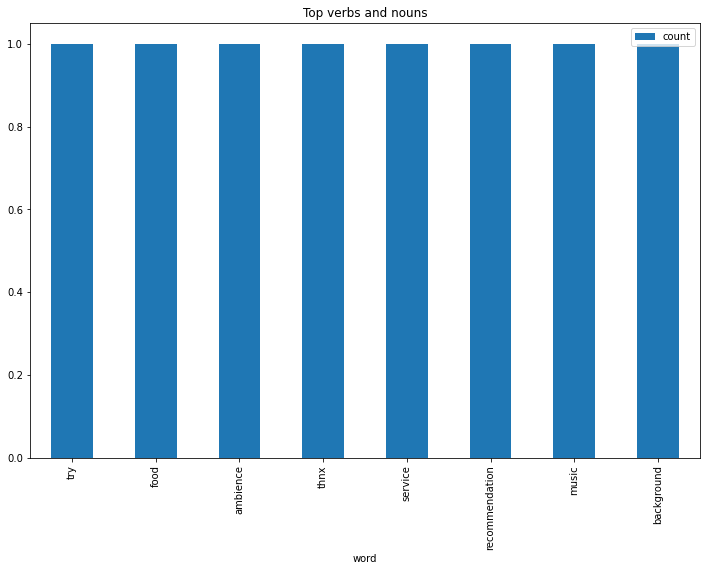

In [18]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [19]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [20]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [21]:
#data['Review'] = data['Review'].astype('str') 

TypeError: list indices must be integers or slices, not str

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
####from wordcloud import WordCloud
%matplotlib inline

import pandas
data=pd.read_csv("zomatoreviews.csv",error_bad_lines=False)


C:\Users\ZomAdmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
data['Review'] = data['Review'].astype('str') 

In [24]:
data = [Review.strip() for Review in data.Review] # remove both the leading and the trailing characters
data = [Review for Review in data if Review] # removes empty strings, because they are considered in Python as False

In [25]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[5:15]

['Ambience is too good for a pleasant evening.',
 'Service is very prompt.',
 'Food is good.',
 'Over all a good experience.',
 'Soumen Das - kudos to the service A must try.. great food great ambience.',
 'Thnx for the service by Pradeep and Subroto.',
 'My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.',
 'Soumen das and Arun was a great guy.',
 'Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.',
 'Food is good.we ordered Kodi drumsticks and basket mutton biryani.']

In [26]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"The ambience was good, food was quite good ."
1,"had Saturday lunch , which was cost effective ."
2,Good place for a sate brunch.
3,One can also chill with friends and or parents.
4,Waiter Soumen Das was really courteous and hel...
...,...
36180,Started with manchow soup and liked it instant...
36181,Thereafter luncheon tray had came with pepper ...
36182,Taste is fine and didn't liked eating egg hakk...
36183,Badly missed dessert along with tray!


In [27]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [28]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [30]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [31]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     9
2     6
3     9
4     8
5     8
6     4
7     3
8     5
9    14
Name: word_count, dtype: int64

In [32]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
7272,LETS begin with drinks first\n\nThey served so...,59,476
493,"Very good service and food, chicken lollipop w...",59,139
27303,but it is in cold condition good Good waste ca...,59,61
3002,HYPER LOCAL has a fusion of modern yet local d...,64,611
5347,Very nice food very service very good staff an...,65,125
5147,Excellent food and excellent service by Mr bah...,66,146
32099,It's nice amazing nice service nice place amaz...,67,90
5295,Food was very tasty and very good service woul...,69,144
7755,#Triedtheblazinchallenge The staff really nice...,72,246
3162,The service captain Roshan was very friendly a...,90,245


In [33]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    36185.000000
mean         1.801078
std          3.626265
min        -20.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         90.000000
Name: sentiment_value, dtype: float64

In [34]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
3,One can also chill with friends and or parents.,0,9
6,Service is very prompt.,0,4
10,Thnx for the service by Pradeep and Subroto.,0,8
14,Food is good.we ordered Kodi drumsticks and ba...,0,10
17,He served well.,0,3


In [35]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
76,Hope everyone behaves the same way We had our ...,23,51
80,The place is very good.. 5* to the live music....,26,43
84,The food is also nice.. Sonalin is a very good...,21,35
382,Polite and very cooperative staff..Amazing foo...,49,118
385,Food quality is good..but some.takes more time...,31,62


In [36]:
sent_df['index']=range(0,len(sent_df))

C:\Users\ZomAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

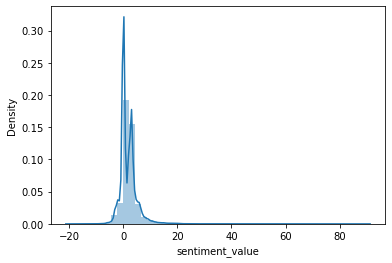

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

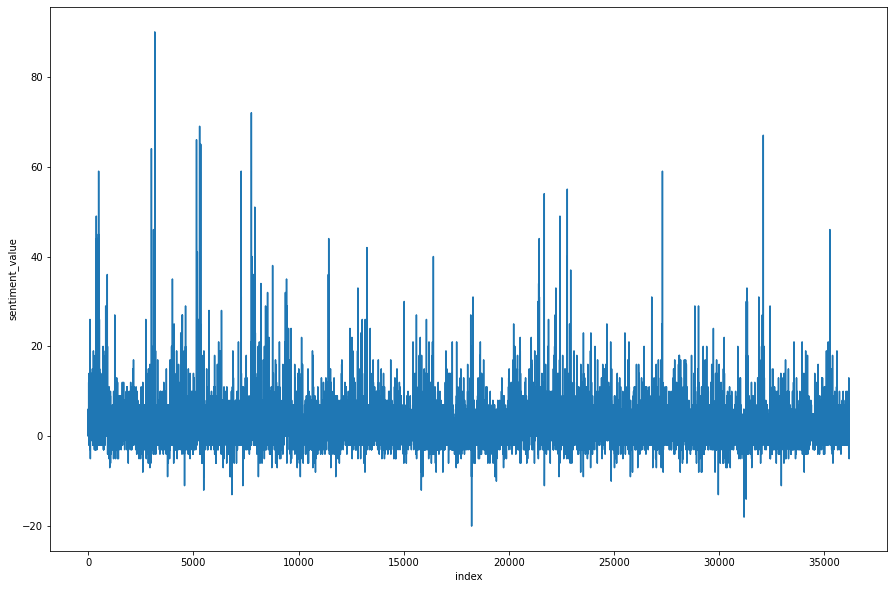

In [38]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

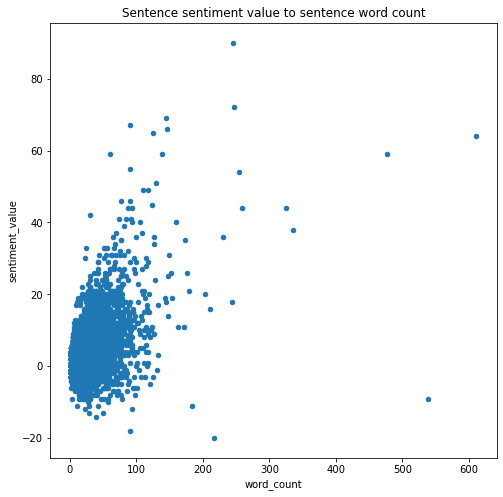

In [39]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')